# Project 3 - Dance of the moons: Janus and Epimetheus - Syed Ahmed Mazhar

**Project deadline:** This project is due for submission on **Friday, 07.06.2024, 11:55pm**. Please check carefully the *About the Projects* section below for further details.

**Imprtant:** You again have the choice between two projects. This one focusses on an introduction to the `scipy`-module and on the implementation of a system of differential equations. You will again create animations woth matplotlib.
In the other project, you can implement a computer game. It focusses more on modules, data structures and Python as a programming language. 

## About the Projects
- You will get one project approximately every other week.
- Besides the homework-assignments, you need to solve the projects in order to pass the course. Your final course mark consists of the mean of your project marks. We aim to hand-out six projects during the term and we do not consider the worst project mark for your final course mark. Projects that you do not hand in are counted with a mark of 4.
- The project needs to be submitted by uploading this notebook to [Projects/Project 3](https://ecampus.uni-bonn.de/goto_ecampus_exc_3381147.html) on eCampus. You do not need to modify the notebooks name before your upload. Your project must be on eCampus by Friday, 07.06.2024, 11:55pm. **No late uploads can be accepted!**
- **In contrast to the homework exercises, each student must hand in an own solution for the projects! Of course you can and should discuss problems with each other! However, you need to be able to explain your solution in detail to your tutor and/or the lecturers! We might ask you for an interview about your project if the solution is (close to) identical to another students submission.**

**Note:** The tutors, Thomas and I are very happy to help you out with difficulties you might have with the project tasks! You can ask questions any time but please do so well in advance of the deadlines!

## Introduction

Epimetheus and Janus are moons that orbit the planet Saturn; see also [this article on Wikipedia](https://en.wikipedia.org/wiki/Epimetheus_(moon). Epimetheus's orbit is *co-orbitag with that of Janus*, i.e. they orbit Saturn on nearly equal trajectories. Janus's mean orbital radius from Saturn is only 50 km less than that of Epimetheus, a distance smaller than either moon's mean radius. All four years, the two moons meet each other as, according to Kepler's law, the inner moon moves a bit faster than the outer one. Your task is to investigate why there is no collision between the two moons.

We want to simulate the three-body-problem of Saturn, Janus and Epimetheus. Our reference frame is the restframe of Saturn. The motion between bodies is then governed by the gravitational law:
$$
m_i\ddot{\vec{x_i}} = \sum_j \vec{F_{ij}}
$$
with
$$
\vec{F_{ij}} = -G\frac{m_im_j}{|\vec{x_i}-\vec{x_j}|^3}(\vec{x_i}-\vec{x_j}).
$$
We assume that all movements take place in a two-dimensional plane and we work in dimensionless units with $G=1$, $m_{\text{J}}=1$, $m_{\text{E}}=4$ and $m_{\text{S}}=4.0\times 10^4$.

The initial conditions for the moons movements are: 
$$
\vec{x_{\text{J}}}(0)=(-155, 0);\, \frac{\text{d}\vec{x_{\text{J}}}(0)}{\text{d}t} = (0, -16.1)
$$
and
$$
\vec{x_{\text{E}}}(0)=(150, 0); \, \frac{\text{d}\vec{x_{\text{E}}}(0)}{\text{d}t} = (0, 16.3).
$$
Note that $\vec{x_S}(t)=0$ for all times!

## Your tasks

0. Due to a reorganisation of the course, we probably will not have the time to give you an introduction to the important `scipy`-module in lecture this year. Therefore, we include it as part of the projects for those who are mainly interested in science/physics applications with the Python language. If you are interested in this project, please first watch Thomas Erben's [Introduction to scipy video](https://youtu.be/wfjqpa2Dsnk) from 2022. Especially important is the part on [numerically solving ordinary differential equations](https://youtu.be/wfjqpa2Dsnk?t=3918) (ODEs). The lecture material for the video can be found [here](https://github.com/terben/Programming_in_Python_BCGS_Summer_2022/tree/master/lecture_09).
**Important:** The rest of the notebook probably will not make too much sense before you watched the video!
1. Prepare the ODE-system governing the movements of the moons for `odeint`. Note that you will obtain eight(!) ODEs of first order in total! Please describe in your solution the used notation. Your grader needs to be able to follow and understand your implementation easily.
2. Solve the system for $0\leq t \leq 2000$ and plot for both moons the distance to Saturn as a function of time. This should make clear how the moons avoid a collision on their orbits.
3. Create an animation of the moons movements with `matplotlib`. You can consider here the range $-200\leq x, y\leq 200$.

**Note:** Task (3) is intentionally quite vague. I received amazing animation videos for the problem from your peers in the past and I am looking forward to your solution! As an inspiration, I show you an example solution below. The first animation represents the expectation for full credits of this task.

<img src="figs/moon_dance.gif" style="height: 200px;"><img src="figs/moon_dance_rings.gif" style="height: 200px;">

### Task 1

We are given a 2nd order ODE in the exercise but any 2nd order ODE can be converted into two first first order ODEs

Let us define $$\dot{{x_E}} = v_E$$, $$\dot{{y_E}} = w_E$$, $$\dot{{x_J}} = v_J$$, $$\dot{{y_J}} = w_J$$
We have basically converted the vector $ {\vec{x_i}} $ into the into its two components along the x and y-axis with $x_i$ and $y_i$.$${\vec{x_i}} = (x_i, y_i)$$ That gives us our first four ODEs. $$$$
Then we use the fact that  $ {\vec{x_s}} = 0 $ always and we set in the values for $m_s, m_J, m_E. G =1 $  so  from the first equation we have for the two bodies. The next four ODEs are

$$\dot{v_E} = \frac{-4 \cdot 10^4 x_E}{|{\vec{x_E}}|^3} - \frac{(x_E - x_J)}{|\vec{x_E}- \vec{x_J}|^3}$$
$$$$
$$\dot{w_E} = \frac{-4 \cdot 10^4 y_E}{|{\vec{x_E}}|^3} - \frac{(y_E - y_J)}{|\vec{x_E}- \vec{x_J}|^3}$$
$$$$
$$\dot{v_J} = \frac{-4 \cdot 10^4 x_J}{|{\vec{x_J}}|^3} + \frac{4 \cdot (x_E - x_J)}{|\vec{x_E}- \vec{x_J}|^3}$$
$$$$
$$\dot{w_J} = \frac{-4 \cdot 10^4 y_J}{|{\vec{x_J}}|^3} + \frac{4 \cdot (y_E - y_J)}{|\vec{x_E}- \vec{x_J}|^3}$$




### Task 2

In [14]:
# Your solution here please
#we import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as si

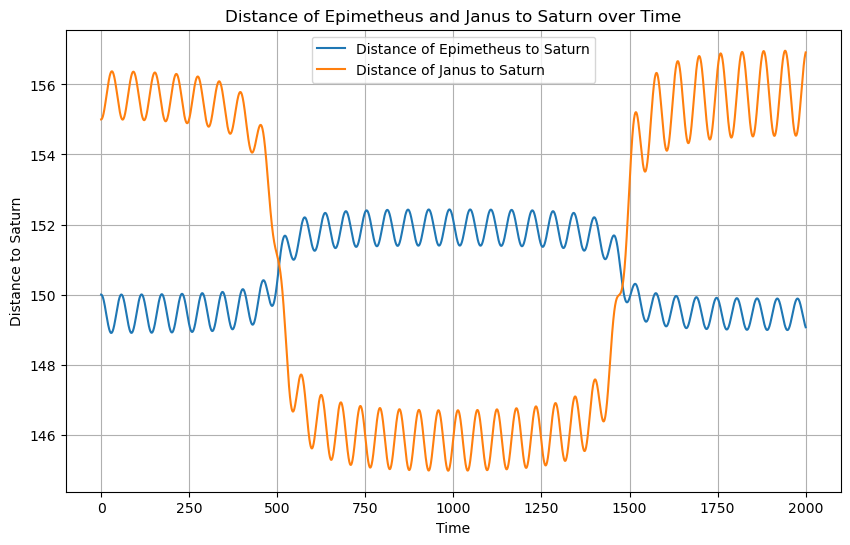

In [11]:


def dSdt(S, t):
    x_E, v_E, y_E, w_E, x_J, v_J, y_J, w_J = S
    
    r_E = np.sqrt(x_E**2 + y_E**2)
    r_J = np.sqrt(x_J**2 + y_J**2)
    r_EJ = np.sqrt((x_E - x_J)**2 + (y_E - y_J)**2)
    
    term1_v_E_dot = (-4 * 10**4 * x_E) / r_E**3
    term2_v_E_dot = -(x_E - x_J) / r_EJ**3
    
    term1_w_E_dot = (-4 * 10**4 * y_E) / r_E**3
    term2_w_E_dot = -(y_E - y_J) / r_EJ**3
    
    term1_v_J_dot = (-4 * 10**4 * x_J) / r_J**3
    term2_v_J_dot = 4 * (x_E - x_J) / r_EJ**3
    
    term1_w_J_dot = (-4 * 10**4 * y_J) / r_J**3
    term2_w_J_dot = 4 * (y_E - y_J) / r_EJ**3
    
    return (v_E, term1_v_E_dot + term2_v_E_dot, w_E, term1_w_E_dot + term2_w_E_dot, v_J, term1_v_J_dot + term2_v_J_dot, w_J, term1_w_J_dot + term2_w_J_dot)

xE_0 = 150
vE_0 = 0
yE_0 = 0
wE_0 = 16.3

xJ_0 = -155
vJ_0 = 0
yJ_0 = 0 
wJ_0 = -16.1

S_0 = (xE_0, vE_0, yE_0, wE_0, xJ_0, vJ_0, yJ_0, wJ_0)

t = np.linspace(0, 2000, 5000)
sol = si.odeint(dSdt, S_0, t)

# Calculate distances to Saturn
dist_E = np.sqrt(sol[:, 0]**2 + sol[:, 2]**2)
dist_J = np.sqrt(sol[:, 4]**2 + sol[:, 6]**2)

# Plot the distances
plt.figure(figsize=(10, 6))
plt.plot(t, dist_E, label="Distance of Epimetheus to Saturn")
plt.plot(t, dist_J, label="Distance of Janus to Saturn")
plt.xlabel('Time')
plt.ylabel('Distance to Saturn')
plt.title('Distance of Epimetheus and Janus to Saturn over Time')
plt.legend()
plt.grid(True)
plt.show()


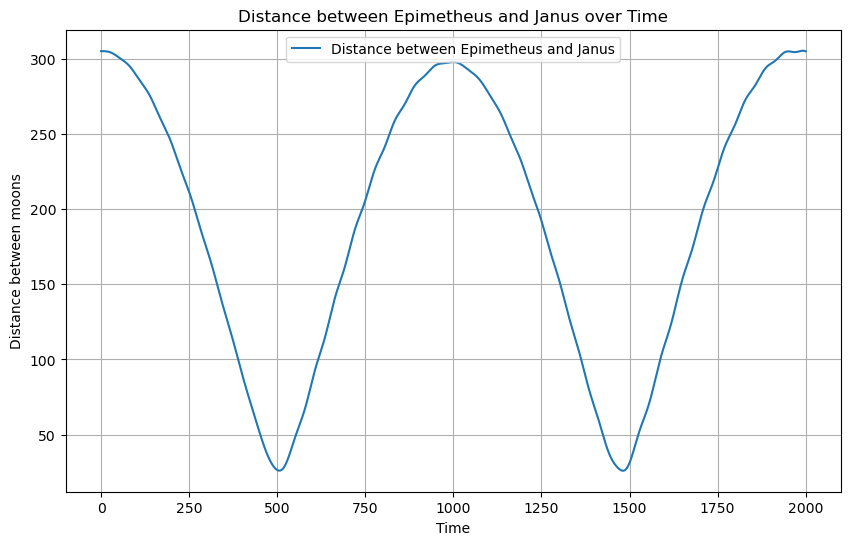

In [13]:


# Check distances between the moons over time to confirm no collision
distance_between_moons = np.sqrt((sol[:, 0] - sol[:, 4])**2 + (sol[:, 2] - sol[:, 6])**2)

plt.figure(figsize=(10, 6))
plt.plot(t, distance_between_moons, label="Distance between Epimetheus and Janus")
plt.xlabel('Time')
plt.ylabel('Distance between moons')
plt.title('Distance between Epimetheus and Janus over Time')
plt.legend()
plt.grid(True)
plt.show()


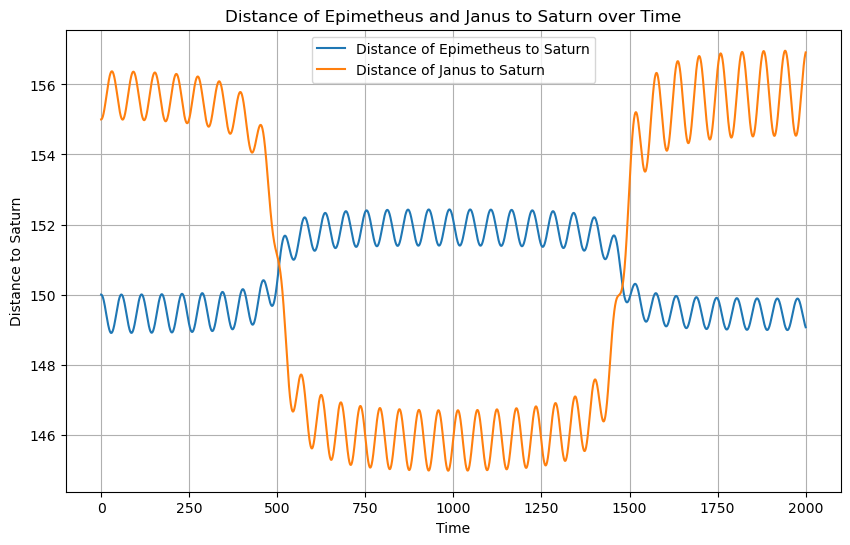

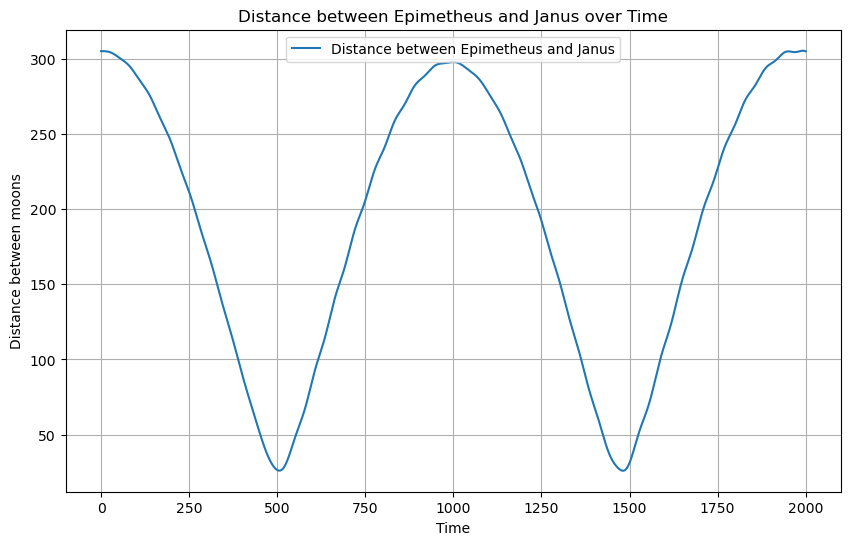

Minimum distance between Epimetheus and Janus: 25.99711332122962
Time at minimum distance: 1481.496299259852


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as si

def dSdt(S, t):
    x_E, v_E, y_E, w_E, x_J, v_J, y_J, w_J = S
    
    r_E = np.sqrt(x_E**2 + y_E**2)
    r_J = np.sqrt(x_J**2 + y_J**2)
    r_EJ = np.sqrt((x_E - x_J)**2 + (y_E - y_J)**2)
    
    term1_v_E_dot = (-4 * 10**4 * x_E) / r_E**3
    term2_v_E_dot = -(x_E - x_J) / r_EJ**3
    
    term1_w_E_dot = (-4 * 10**4 * y_E) / r_E**3
    term2_w_E_dot = -(y_E - y_J) / r_EJ**3
    
    term1_v_J_dot = (-4 * 10**4 * x_J) / r_J**3
    term2_v_J_dot = 4 * (x_E - x_J) / r_EJ**3
    
    term1_w_J_dot = (-4 * 10**4 * y_J) / r_J**3
    term2_w_J_dot = 4 * (y_E - y_J) / r_EJ**3
    
    return (v_E, term1_v_E_dot + term2_v_E_dot, w_E, term1_w_E_dot + term2_w_E_dot, v_J, term1_v_J_dot + term2_v_J_dot, w_J, term1_w_J_dot + term2_w_J_dot)

xE_0 = 150
vE_0 = 0
yE_0 = 0
wE_0 = 16.3

xJ_0 = -155
vJ_0 = 0
yJ_0 = 0 
wJ_0 = -16.1

S_0 = (xE_0, vE_0, yE_0, wE_0, xJ_0, vJ_0, yJ_0, wJ_0)

t = np.linspace(0, 2000, 5000)
sol = si.odeint(dSdt, S_0, t)

# Calculate distances to Saturn
dist_E = np.sqrt(sol[:, 0]**2 + sol[:, 2]**2)
dist_J = np.sqrt(sol[:, 4]**2 + sol[:, 6]**2)

# Plot the distances
plt.figure(figsize=(10, 6))
plt.plot(t, dist_E, label="Distance of Epimetheus to Saturn")
plt.plot(t, dist_J, label="Distance of Janus to Saturn")
plt.xlabel('Time')
plt.ylabel('Distance to Saturn')
plt.title('Distance of Epimetheus and Janus to Saturn over Time')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the distance between the moons
distance_between_moons = np.sqrt((sol[:, 0] - sol[:, 4])**2 + (sol[:, 2] - sol[:, 6])**2)

plt.figure(figsize=(10, 6))
plt.plot(t, distance_between_moons, label="Distance between Epimetheus and Janus")
plt.xlabel('Time')
plt.ylabel('Distance between moons')
plt.title('Distance between Epimetheus and Janus over Time')
plt.legend()
plt.grid(True)
plt.show()

# Find and print the minimum distance between the moons
min_distance = np.min(distance_between_moons)
min_distance_time = t[np.argmin(distance_between_moons)]

print("Minimum distance between Epimetheus and Janus:", min_distance)
print("Time at minimum distance:", min_distance_time)
